In [1]:
import numpy as np
import pandas as pd
import random

請從給定的網址讀取本次測驗的資料集：https://github.com/TA-aiacademy/course_3.0/releases/download/Python/housing.csv

In [2]:
url = "https://github.com/TA-aiacademy/course_3.0/releases/download/Python/housing.csv"
df = pd.read_csv(url)


首先，先查看整份資料集相關資訊。  
hint：info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19743 entries, 0 to 19742
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19405 non-null  float64
 1   latitude            19382 non-null  float64
 2   housing_median_age  19743 non-null  float64
 3   total_rooms         19743 non-null  float64
 4   total_bedrooms      19743 non-null  float64
 5   population          19743 non-null  float64
 6   households          19743 non-null  float64
 7   median_income       19743 non-null  float64
 8   median_house_value  19743 non-null  float64
 9   ocean_proximity     19575 non-null  object 
 10  level               19743 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.7+ MB


從上面可以看出，longitude、latitude 和 ocean_proximity 具有缺值。  
接下來，試著印出資料集的前 8 筆資料。

In [4]:
print(df.head(8))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -118.38     33.80                36.0       4421.0           702.0   
1    -122.27     37.43                33.0       1601.0           223.0   
2    -118.41     33.75                 4.0        311.0            51.0   
3    -118.33     33.77                33.0       4244.0           595.0   
4    -118.32     33.75                33.0       2996.0           398.0   
5    -118.32     33.75                37.0       1080.0           135.0   
6    -118.32     33.74                24.0       6097.0           794.0   
7    -118.32     33.77                37.0        627.0            95.0   

   population  households  median_income  median_house_value ocean_proximity  \
0      1433.0       624.0         8.0838            500001.0      NEAR OCEAN   
1       629.0       215.0        15.0001            500001.0      NEAR OCEAN   
2       128.0        46.0         9.8091            500001.0      NEAR OCEAN   
3   

再來，試著檢查資料集的大小 (形狀)，了解資料及共有幾筆資料和幾個欄位。

In [5]:
# 獲取資料集的行數和列數
rows, columns = df.shape

# 輸出結果
print("資料集共有 {} 筆資料和 {} 個欄位。".format(rows, columns))

資料集共有 19743 筆資料和 11 個欄位。


觀察了資料後，第一步，我們要先處理缺失值。  
首先先找出含有 na 的全部資料。

In [6]:
# 選擇含有缺失值的全部資料
data_with_na = df[df.isna().any(axis=1)]

# 輸出結果
print(data_with_na)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
64       -121.98       NaN                19.0        755.0            93.0   
84       -118.49       NaN                31.0       4066.0           951.0   
90           NaN     37.79                52.0       1817.0           535.0   
99           NaN     37.44                35.0       1140.0           193.0   
114          NaN     37.50                46.0         30.0             4.0   
...          ...       ...                 ...          ...             ...   
19625    -119.77       NaN                39.0       1287.0           332.0   
19640    -119.20       NaN                32.0       1355.0           363.0   
19649    -114.63       NaN                15.0       1448.0           378.0   
19670    -119.00       NaN                40.0        850.0           227.0   
19742    -122.74       NaN                16.0        255.0            73.0   

       population  households  median_income  media

從上面可以知道，所有有缺失值的資料筆數總共是 860 筆。  
我們也可以只取某一欄位含有缺失值的資料出來觀察，接下來，請試著取出 ocean_proximity 為缺失值的資料，並存到另一變數當中。

In [7]:
# 選擇 'ocean_proximity' 欄位為缺失值的資料
data_with_missing_ocean_proximity = df[df['ocean_proximity'].isna()]

# 輸出結果
print(data_with_missing_ocean_proximity)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
162      -118.21     34.20                35.0       3646.0           552.0   
165      -118.18     34.17                43.0       4269.0           591.0   
166      -122.00     37.23                36.0       3191.0           430.0   
237      -118.40     33.89                36.0       2127.0           314.0   
278      -117.87     33.59                44.0       2499.0           396.0   
...          ...       ...                 ...          ...             ...   
17148    -118.25     34.01                28.0        481.0           136.0   
17160    -118.24     33.95                37.0        441.0           125.0   
18214    -117.71     33.61                26.0       3046.0           726.0   
18491    -118.29     34.06                42.0       3894.0          2293.0   
19547    -123.72     41.09                19.0       1970.0           431.0   

       population  households  median_income  media

觀察完有缺失值的資料後，我們要開始對缺失值進行處理。  
首先，ocean_proximity 為類別型資料，請試著列出該欄位所有類別和類別的個數。

In [8]:
# 列出 'ocean_proximity' 欄位的所有類別和類別個數
ocean_proximity_counts = df['ocean_proximity'].value_counts()

# 輸出結果
print(ocean_proximity_counts)

<1H OCEAN     8579
INLAND        6261
NEAR OCEAN    2533
NEAR BAY      2197
ISLAND           5
Name: ocean_proximity, dtype: int64


請試著用個數最多的類別填補 ocean_proximity 的缺失值

In [9]:
# 找到個數最多的類別
most_common_category = df['ocean_proximity'].value_counts().idxmax()

# 使用個數最多的類別填補缺失值
df['ocean_proximity'].fillna(most_common_category, inplace=True)


剩下含有缺失值的 longitude、latitude 和 total_bedrooms 為數值型資料。  
接著，請清除所有具缺失值的資料。

In [10]:
# 清除所有具有缺失值的資料
df_cleaned = df.dropna()

# 顯示清除後的資料集大小
print("清除後的資料集大小：", df_cleaned.shape)


清除後的資料集大小： (19044, 11)


最後，再顯示一次所有資料的相關資資訊，確定是否還有缺失值。

In [11]:
# 顯示清除後的資料集相關資訊
print(df_cleaned.info())

# 檢查資料集是否還有缺失值
has_missing_values = df_cleaned.isna().any().any()

# 輸出結果
if has_missing_values:
    print("資料集中仍有缺失值。")
else:
    print("資料集中沒有缺失值。")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19044 entries, 0 to 19741
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19044 non-null  float64
 1   latitude            19044 non-null  float64
 2   housing_median_age  19044 non-null  float64
 3   total_rooms         19044 non-null  float64
 4   total_bedrooms      19044 non-null  float64
 5   population          19044 non-null  float64
 6   households          19044 non-null  float64
 7   median_income       19044 non-null  float64
 8   median_house_value  19044 non-null  float64
 9   ocean_proximity     19044 non-null  object 
 10  level               19044 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.7+ MB
None
資料集中沒有缺失值。


使用 describe 顯示各個欄位的統計量

In [12]:
# 使用 describe 顯示各個欄位的統計量
description = df_cleaned.describe()

# 輸出結果
print(description)


          longitude      latitude  housing_median_age   total_rooms  \
count  19044.000000  19044.000000        19044.000000  19044.000000   
mean    -119.567912     35.628830           28.619145   2640.316110   
std        2.000390      2.133736           12.576401   2184.806006   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.250000           29.000000   2126.500000   
75%     -118.010000     37.710000           37.000000   3150.000000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    19044.000000  19044.000000  19044.000000   19044.000000   
mean       538.885896   1427.430582    500.336746       3.870969   
std        422.643879   1138.903177    383.448011       1.895007   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

請依照 median_house_value 由大至小排序。

In [13]:
# 依照 median_house_value 由大至小排序
sorted_df = df_cleaned.sort_values(by='median_house_value', ascending=False)

# 顯示排序後的結果
print(sorted_df)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -118.38     33.80                36.0       4421.0           702.0   
624      -118.48     34.05                36.0       2143.0           434.0   
613      -122.14     37.45                52.0       3841.0           537.0   
614      -122.15     37.46                52.0       1803.0           257.0   
615      -122.15     37.46                39.0        906.0           109.0   
...          ...       ...                 ...          ...             ...   
19737    -117.16     32.71                52.0        845.0           451.0   
19738    -118.33     34.15                39.0        493.0           168.0   
19739    -123.17     40.31                36.0         98.0            28.0   
19740    -117.02     36.40                19.0        619.0           239.0   
19741    -117.86     34.24                52.0        803.0           267.0   

       population  households  median_income  media

請畫出 median_house_value 的直方圖 (hist)、機率密度統計圖 (kde)、盒型圖 (box)

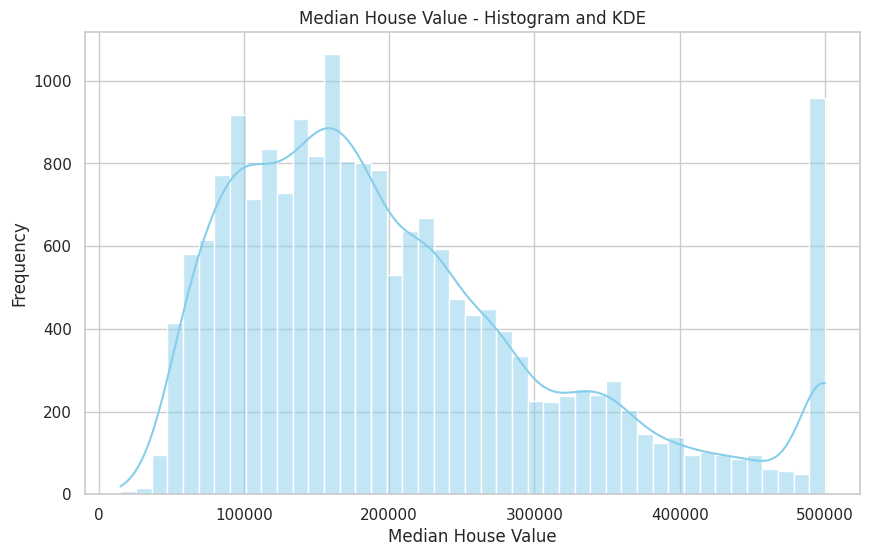

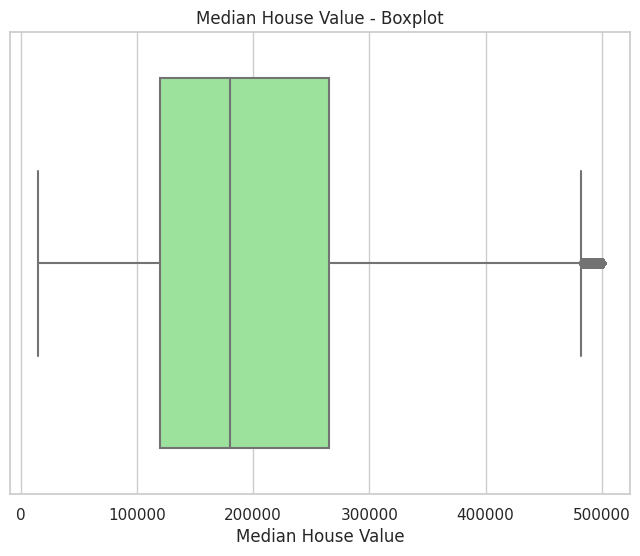

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設置圖表風格為seaborn
sns.set(style='whitegrid')

# 繪製直方圖和KDE
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['median_house_value'], kde=True, color='skyblue')
plt.title('Median House Value - Histogram and KDE')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# 繪製盒型圖
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['median_house_value'], color='lightgreen')
plt.title('Median House Value - Boxplot')
plt.xlabel('Median House Value')
plt.show()


請依照 median_house_value 的高低，  
將低於(含) 25 百分位的分為 'L'；  
25 百分位至 75 百分位的分為 'M'；  
高於 (含) 75 百分位的分為 'H'，並存至 'level' 欄位中

In [15]:
# 計算 25 百分位和 75 百分位
q25 = df_cleaned['median_house_value'].quantile(0.25)
q75 = df_cleaned['median_house_value'].quantile(0.75)

# 定義函式根據 median_house_value 的值來分類為 'L'、'M' 或 'H'
def categorize_level(value):
    if value <= q25:
        return 'L'
    elif value <= q75:
        return 'M'
    else:
        return 'H'

# 創建 'level' 欄位並根據 'median_house_value' 的值進行分類
df_cleaned['level'] = df_cleaned['median_house_value'].apply(categorize_level)

# 顯示處理後的資料集
print(df_cleaned.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -118.38     33.80                36.0       4421.0           702.0   
1    -122.27     37.43                33.0       1601.0           223.0   
2    -118.41     33.75                 4.0        311.0            51.0   
3    -118.33     33.77                33.0       4244.0           595.0   
4    -118.32     33.75                33.0       2996.0           398.0   

   population  households  median_income  median_house_value ocean_proximity  \
0      1433.0       624.0         8.0838            500001.0      NEAR OCEAN   
1       629.0       215.0        15.0001            500001.0      NEAR OCEAN   
2       128.0        46.0         9.8091            500001.0      NEAR OCEAN   
3      1534.0       557.0         9.8214            500001.0      NEAR OCEAN   
4      1048.0       387.0         9.2670            500001.0      NEAR OCEAN   

  level  
0     H  
1     H  
2     H  
3     H  
4     H  


<ipython-input-15-e5576db1731f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['level'] = df_cleaned['median_house_value'].apply(categorize_level)


請顯示 ocean_proximity 和 level 的統計量

In [16]:
# 顯示 'ocean_proximity' 欄位的統計量
ocean_proximity_counts = df_cleaned['ocean_proximity'].value_counts()
print("ocean_proximity 的統計量：\n", ocean_proximity_counts)

# 顯示 'level' 欄位的統計量
level_counts = df_cleaned['level'].value_counts()
print("\nlevel 的統計量：\n", level_counts)

ocean_proximity 的統計量：
 <1H OCEAN     8452
INLAND        6020
NEAR OCEAN    2453
NEAR BAY      2114
ISLAND           5
Name: ocean_proximity, dtype: int64

level 的統計量：
 M    9518
L    4767
H    4759
Name: level, dtype: int64


請使用 pivot_table ，設定 level 的各個類別為列、ocean_proximity 的各個類別為欄，  
並且計算每個組別下 median_house_value 的平均。

In [17]:
# 建立透視表，計算每個組別下 median_house_value 的平均
pivot_table = pd.pivot_table(df_cleaned, values='median_house_value', index='level', columns='ocean_proximity', aggfunc='mean')

# 顯示透視表
print(pivot_table)


ocean_proximity      <1H OCEAN         INLAND    ISLAND       NEAR BAY  \
level                                                                    
H                370497.014723  350705.697761  380440.0  381704.632955   
L                100190.648567   82888.727556       NaN   94795.473251   
M                191298.171206  163355.335434       NaN  190870.433905   

ocean_proximity     NEAR OCEAN  
level                           
H                377976.590387  
L                 93442.121212  
M                188655.060034  


上述發現， ISLAND 類別中有 NaN ，請列出所有 ocean_proximity 為 ISLAND 的資料觀察原因。

In [18]:
# 選取 ocean_proximity 為 'ISLAND' 且包含 NaN 值的資料
island_with_nan = df_cleaned[(df_cleaned['ocean_proximity'] == 'ISLAND') & df_cleaned.isna().any(axis=1)]

# 顯示選取的資料
print(island_with_nan)


Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity, level]
Index: []


請使用 groupby ，算出 level 欄位各個類別的 median_house_value 平均值

In [19]:
# 使用 groupby 計算 level 欄位各個類別的 median_house_value 平均值
level_median_house_value_mean = df_cleaned.groupby('level')['median_house_value'].mean()

# 顯示結果
print(level_median_house_value_mean)


level
H    372969.445892
L     86632.619467
M    184409.455768
Name: median_house_value, dtype: float64


最後，請使用 left join 的方式，將  level 欄位各個類別的 median_house_value 併入到資料集當中。

In [20]:
# 使用 groupby 計算 level 欄位各個類別的 median_house_value 平均值
level_median_house_value_mean = df_cleaned.groupby('level')['median_house_value'].mean()

# 將計算得到的平均值併入到資料集中
df_with_level_median_house_value = df_cleaned.merge(level_median_house_value_mean, left_on='level', right_index=True, suffixes=('', '_mean'))

# 顯示結果
print(df_with_level_median_house_value.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -118.38     33.80                36.0       4421.0           702.0   
1    -122.27     37.43                33.0       1601.0           223.0   
2    -118.41     33.75                 4.0        311.0            51.0   
3    -118.33     33.77                33.0       4244.0           595.0   
4    -118.32     33.75                33.0       2996.0           398.0   

   population  households  median_income  median_house_value ocean_proximity  \
0      1433.0       624.0         8.0838            500001.0      NEAR OCEAN   
1       629.0       215.0        15.0001            500001.0      NEAR OCEAN   
2       128.0        46.0         9.8091            500001.0      NEAR OCEAN   
3      1534.0       557.0         9.8214            500001.0      NEAR OCEAN   
4      1048.0       387.0         9.2670            500001.0      NEAR OCEAN   

  level  median_house_value_mean  
0     H            372969.445892 